In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
sales = pd.read_csv("SalesData.csv")

In [4]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


### 1. Compare Sales by region for 2016 with 2015 using bar chart

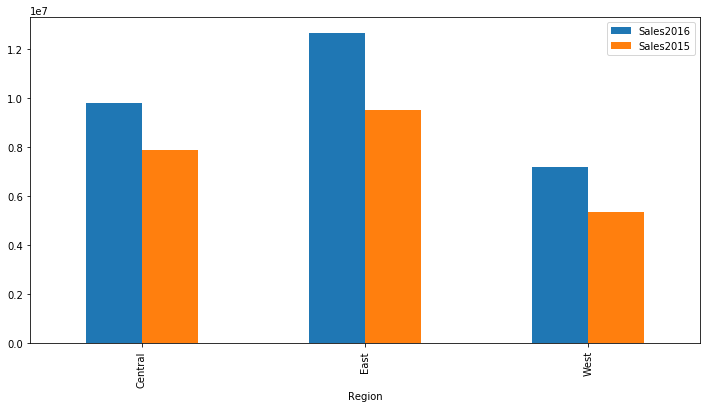

In [11]:
sales1 = sales.groupby('Region')[['Sales2016', 'Sales2015']].sum()

sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001ABA4290F48>],
      dtype=object)

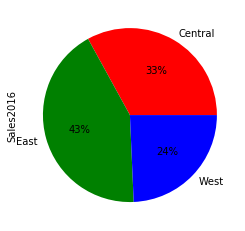

In [14]:
sales2 = sales.groupby('Region').Sales2016.sum()

sales2.plot(kind='pie', 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

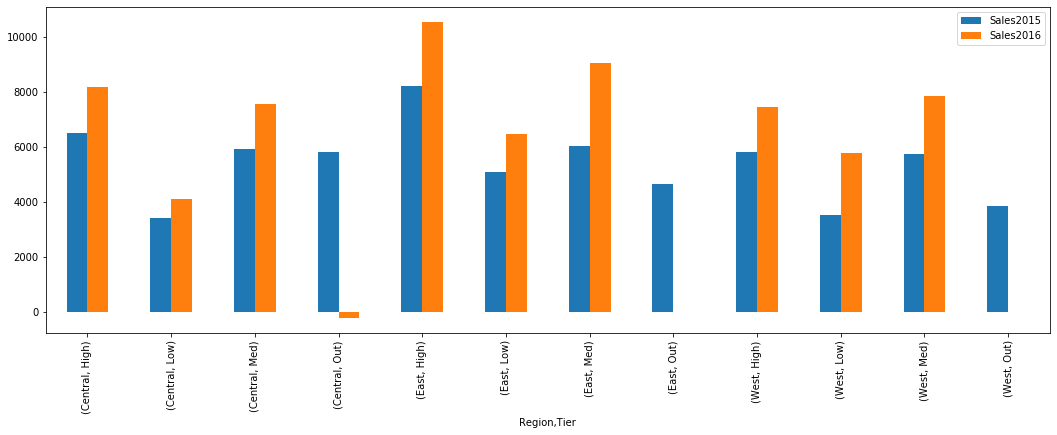

In [27]:
sales3 = sales.groupby(['Region', 'Tier'])[['Sales2015', 'Sales2016']].mean()

sales3graph=sales3.plot.bar(figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

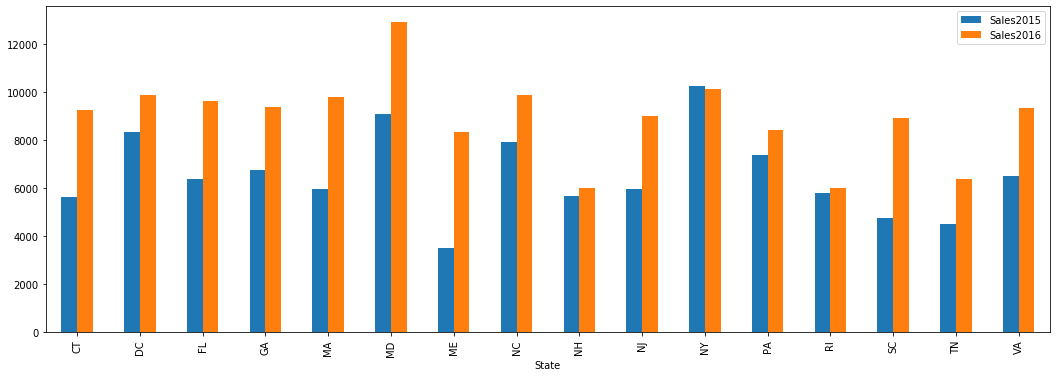

In [42]:
sales4 = sales[sales['Region'] == 'East']
sales4 = sales4.groupby('State')[['Sales2015', 'Sales2016']].mean()

sales4graph=sales4.plot.bar(figsize=(18,6))

### <p style="color:blue;"> In East region, NY registered a decline in 2016 as compared to 2015

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

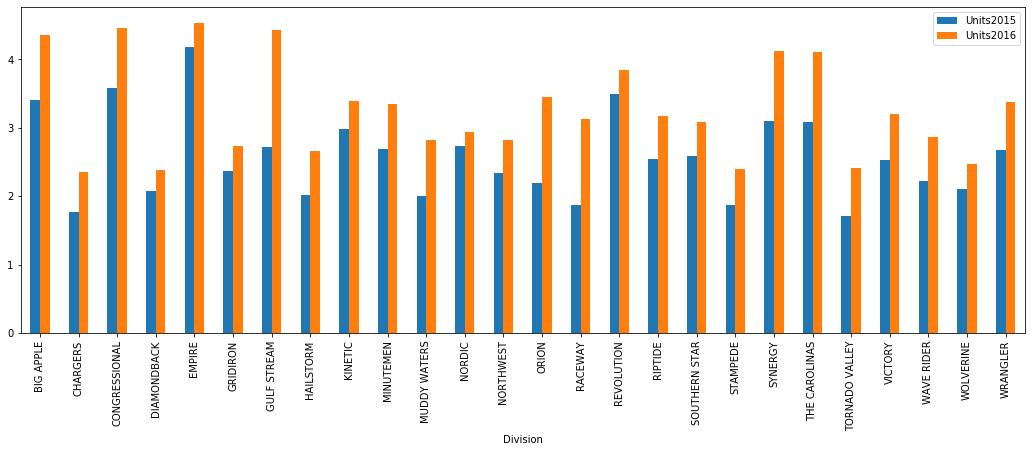

In [43]:
sales5 = sales[sales['Tier'] == 'High']
sales5 = sales5.groupby('Division')[['Units2015', 'Units2016']].mean()

sales5graph=sales5.plot.bar(figsize=(18,6))

### <p style="color:blue;"> No Division saw a decline in number of units sold in 2016 compared to 2015

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [30]:
sales['Qtr'] = np.where((sales['Month'] == 'Jan') | (sales['Month'] == 'Feb') | (sales['Month'] == 'Mar'), 'Q1',
                        np.where((sales['Month'] == 'Apr') | (sales['Month'] == 'May') | (sales['Month'] == 'Jun'),'Q2',
                                 np.where((sales['Month'] == 'Jul') | (sales['Month'] == 'Aug') | (sales['Month'] == 'Sep'),'Q3','Q4')))
sales.head(15)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45,Q3
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99,Q1
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0,1.0,0.79,1.46,Q1
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0,2.0,1.12,1.02,Q1
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0,4.0,1.11,1.54,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


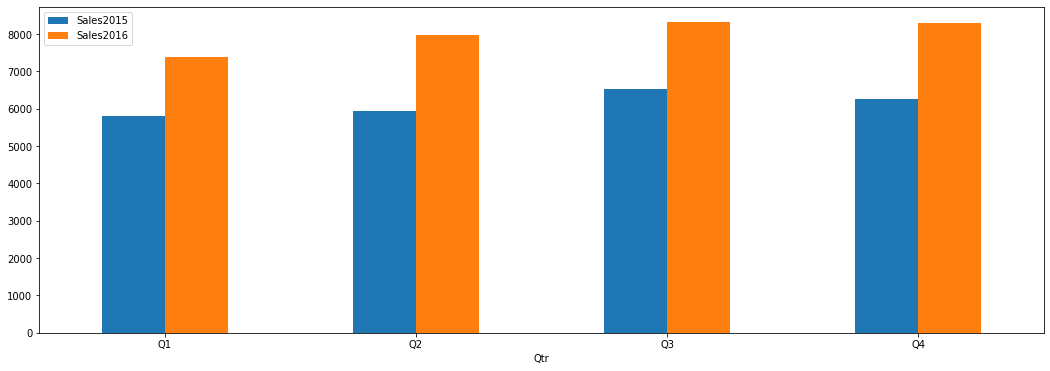

In [14]:
sales6 = sales.groupby('Qtr')[['Sales2015', 'Sales2016']].mean()

sales6graph=sales6.plot.bar(figsize=(18,6), rot = 0)

### 8. Determine the composition of Qtr wise sales in 2016 with regards to all the Tiers in a pie chart.

In [41]:
sales8 = sales[sales['Tier']!='Out']
sales8 = sales8.groupby(['Tier','Qtr'])['Sales2016'].sum()
sales8 = sales8.round(decimals=0)
sales8 = sales8.unstack(level=1)
sales8

Qtr,Q1,Q2,Q3,Q4
Tier,,,,
High,3867719.0,4130953.0,4872559.0,4740002.0
Low,948833.0,890595.0,795178.0,742659.0
Med,2181402.0,2215814.0,2197058.0,2085207.0


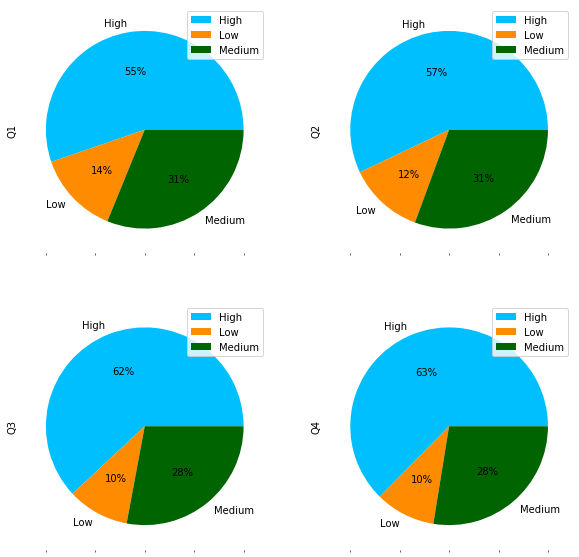

In [44]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()